# Autoencoders

<div style="display: flex; align-items: center;">
    <img src="../imgs/Autoencoders.jpg" alt="Your Image" width="600" style="margin-right: 20px;">
    <div>
        <p>Autoencoder can be understood as a system that attempts to restore its original input. From the above figure, it can be seen that the autoencoder model mainly consists of an encoder and a decoder. Its main purpose is to convert the input x into an intermediate variable y, and then convert y into ~x, and then compare the input x and output ~x to make them infinitely close.
</p>
    </div>
</div>

In deep learning, an autoencoder is an unsupervised neural network model that can learn the implicit features of input data, which is called encoding. At the same time, the learned new features can reconstruct the original input data, which is called decoding. From an intuitive perspective, autoencoders can be used for feature dimensionality reduction. In addition to performing feature dimensionality reduction, new features learned by autoencoders can be fed into supervised learning models, so autoencoders can act as feature extractors.

In this chapter, we will first build an autoencoder. Then we train it in MNIST and use the Encoder from the trained autoencoder as the feature processor to serve the MLP we used in the previous section. In the end, train the entire network in MNIST.

## Autoencoder

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Encoder(torch.nn.Module):
    def __init__(self, input_size, hidden_size, latent_size):
        super(Encoder, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, latent_size)

    def forward(self, x):# x: bs,input_size
        x = F.relu(self.linear1(x)) #-> bs,hidden_size
        x = self.linear2(x) #-> bs,latent_size
        return x

class Decoder(torch.nn.Module):
    def __init__(self, latent_size, hidden_size, output_size):
        super(Decoder, self).__init__()
        self.linear1 = torch.nn.Linear(latent_size, hidden_size)
        self.linear2 = torch.nn.Linear(hidden_size, output_size)        

    def forward(self, x): # x:bs,latent_size
        x = F.relu(self.linear1(x)) #->bs,hidden_size
        x = torch.sigmoid(self.linear2(x)) #->bs,output_size
        return x

class AE(torch.nn.Module):
    def __init__(self, input_size, output_size, latent_size, hidden_size):
        super(AE, self).__init__()
        self.encoder = Encoder(input_size, hidden_size, latent_size)
        self.decoder = Decoder(latent_size, hidden_size, output_size)
    def forward(self, x):
        batch_size = x.shape[0]
        x = x.view(batch_size, -1)
        feat = self.encoder(x) #feat: bs,latent_size
        re_x = self.decoder(feat) #re_x: bs, output_size
        return re_x

## Use class MINISTTrainer to train AE

The `MNISTTrainer` class is designed to facilitate training and evaluation of neural network models on the MNIST dataset. It provides functionalities for model training, validation, testing, and plotting training progress.

Parameters:<br>
- `model`: The neural network model to be trained. It should be an instance of a PyTorch nn.Module.<br>
- `lr`: The learning rate used by the optimizer for updating model parameters during training.<br>
- `loss`: The loss function used to calculate the discrepancy between predicted and actual values during training.It could be one of the following: `MSE`, `CE`, `BCE`, `Logistic` or `MAE`.<br>
- `optimizer`: The optimization algorithm used to update model parameters during training. It could be one of the following: `SGD`, `Adam`, `RMSprop`, `AdamW`, `Adagrad`, or `Adadelta`.<br>
- `batch_size`: The number of samples per batch during training.<br>
- `epoch`: The number of training epochs, i.e., the number of times the entire dataset is passed through the model during training.<br>
- `model_type`: Specifies the type of the model, which can be either `classification` or `recovery`. If `classification`, the model is trained for image classification tasks; if `recovery`, the model is trained for image recovery tasks.<br>
- `seed`: The random seed used for reproducibility.<br>

In [ ]:
import sys
sys.path.append('../tools')
from MNIST import MNISTTrainer

ae = AE(input_size=28*28, output_size=28*28, latent_size=16, hidden_size=128)
trainer_ae = MNISTTrainer(ae, loss='MSE', lr=0.01, optimizer='Adam', batch_size=32, epoch=20, model_type='recovery')
trainer_ae.train()

2024-05-15 19:25:44
Epoch 1 / 20


[Valid]: 100%|███████████████████████| 188/188 [00:01<00:00, 140.82it/s, val_acc=0, val_loss=0.0261]


2024-05-15 19:26:02
Epoch 2 / 20


[Valid]: 100%|███████████████████████| 188/188 [00:01<00:00, 141.30it/s, val_acc=0, val_loss=0.0261]


2024-05-15 19:26:22
Epoch 3 / 20


[Valid]: 100%|███████████████████████| 188/188 [00:01<00:00, 140.79it/s, val_acc=0, val_loss=0.0262]


2024-05-15 19:26:41
Epoch 4 / 20


[Valid]: 100%|███████████████████████| 188/188 [00:01<00:00, 141.57it/s, val_acc=0, val_loss=0.0264]


2024-05-15 19:27:00
Epoch 5 / 20


[Valid]: 100%|███████████████████████| 188/188 [00:01<00:00, 137.87it/s, val_acc=0, val_loss=0.0265]


2024-05-15 19:27:20
Epoch 6 / 20


[Valid]: 100%|███████████████████████| 188/188 [00:01<00:00, 142.47it/s, val_acc=9.88, val_loss=nan]


2024-05-15 19:27:39
Epoch 7 / 20


[Valid]: 100%|███████████████████████| 188/188 [00:01<00:00, 146.74it/s, val_acc=9.88, val_loss=nan]


2024-05-15 19:27:55
Epoch 8 / 20


[Valid]: 100%|███████████████████████| 188/188 [00:01<00:00, 144.93it/s, val_acc=9.88, val_loss=nan]


2024-05-15 19:28:11
Epoch 9 / 20


[Valid]: 100%|███████████████████████| 188/188 [00:01<00:00, 141.47it/s, val_acc=9.88, val_loss=nan]


2024-05-15 19:28:27
Epoch 10 / 20


[Valid]: 100%|███████████████████████| 188/188 [00:01<00:00, 145.74it/s, val_acc=9.88, val_loss=nan]


2024-05-15 19:28:43
Epoch 11 / 20


[Valid]: 100%|███████████████████████| 188/188 [00:01<00:00, 145.41it/s, val_acc=9.88, val_loss=nan]


2024-05-15 19:28:59
Epoch 12 / 20


[Valid]: 100%|███████████████████████| 188/188 [00:01<00:00, 141.37it/s, val_acc=9.88, val_loss=nan]


2024-05-15 19:29:16
Epoch 13 / 20


[Valid]: 100%|███████████████████████| 188/188 [00:01<00:00, 140.07it/s, val_acc=9.88, val_loss=nan]


2024-05-15 19:29:32
Epoch 14 / 20


[Valid]: 100%|███████████████████████| 188/188 [00:01<00:00, 141.13it/s, val_acc=9.88, val_loss=nan]


2024-05-15 19:29:49
Epoch 15 / 20


[Valid]: 100%|███████████████████████| 188/188 [00:01<00:00, 137.37it/s, val_acc=9.88, val_loss=nan]


2024-05-15 19:30:05
Epoch 16 / 20


[Valid]: 100%|███████████████████████| 188/188 [00:01<00:00, 129.44it/s, val_acc=9.88, val_loss=nan]


2024-05-15 19:30:22
Epoch 17 / 20


[Valid]: 100%|███████████████████████| 188/188 [00:01<00:00, 135.37it/s, val_acc=9.88, val_loss=nan]


2024-05-15 19:30:39
Epoch 18 / 20


[Valid]: 100%|███████████████████████| 188/188 [00:01<00:00, 136.01it/s, val_acc=9.88, val_loss=nan]


2024-05-15 19:30:56
Epoch 19 / 20


[Valid]: 100%|███████████████████████| 188/188 [00:01<00:00, 139.96it/s, val_acc=9.88, val_loss=nan]


2024-05-15 19:31:12
Epoch 20 / 20


[Valid]: 100%|███████████████████████| 188/188 [00:01<00:00, 134.51it/s, val_acc=9.88, val_loss=nan]


### Feature Dimensionality Reduction
We have sucessfully trained the AE on the MNIST, now let's check the ability of feature dimensionality reduction!

In [28]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms

dataset = datasets.MNIST(root='.data', train=True, download=False, transform=transforms.ToTensor())
raw = dataset[0][0].view(1,-1) #raw: bs,28,28->bs,28*28
feat = ae.encoder(raw)
print(raw.shape,'->',feat.shape)

torch.Size([1, 784]) -> torch.Size([1, 16])


## Feature Extractors
Now, let's take a look at the ability of AE as a feature extractor. We integrated the encoder from AE into the MLP we used in the previous section, and trained and tested it in MNIST. And we also train the common MLP, to compare them.<br>
One thing need to say is that you may see a very closed result between MLP and new_MLP, because the MNIST dataset is very simple, a simple model is sufficient to handle it, and deeper models will not have a more significant improvement.

In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F

ae.eval()
encoder = ae.encoder

class new_MLP(nn.Module):
    def __init__(self, output_size):
        super().__init__()
        self.encoder = encoder
        self.input_fc = nn.Linear(16, 256)
        self.hidden_fc_1 = nn.Linear(256, 128)
        self.output_fc = nn.Linear(128, output_size)
        
    def forward(self, x):
        batch_size = x.shape[0]
        x = x.view(batch_size, -1)
        feature = self.encoder(x)
        x = F.relu(self.input_fc(feature))
        x = F.relu(self.hidden_fc_1(x))
        y_hat = self.output_fc(x)
        return y_hat

class MLP(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        
        self.input_fc = nn.Linear(input_size, 256)
        self.hidden_fc_1 = nn.Linear(256, 128)
        self.output_fc = nn.Linear(128, output_size)
        
    def forward(self, x):
        batch_size = x.shape[0]
        x = x.view(batch_size, -1)
        
        x = F.relu(self.input_fc(x))
        x = F.relu(self.hidden_fc_1(x))
        y_hat = self.output_fc(x)
        
        return y_hat

In [30]:
import sys
sys.path.append('../tools')
from MNIST import MNISTTrainer

model = new_MLP(output_size=10)
mlp = MLP(input_size=28*28, output_size=10)
trainer_model = MNISTTrainer(model, loss='CE', lr=0.01, optimizer='Adam', batch_size=256, epoch=10, model_type='classification')
trainer_mlp = MNISTTrainer(mlp, loss='CE', lr=0.01, optimizer='Adam', batch_size=256, epoch=10, model_type='classification')

2024-05-13 22:06:26
Epoch 1 / 10


[Valid]: 100%|█████████████████████| 24/24 [00:01<00:00, 20.35it/s, val_acc=94.8, val_loss=0.000681]


2024-05-13 22:06:38
Epoch 2 / 10


[Valid]: 100%|█████████████████████| 24/24 [00:01<00:00, 19.67it/s, val_acc=95.6, val_loss=0.000588]


2024-05-13 22:06:51
Epoch 3 / 10


[Valid]: 100%|█████████████████████| 24/24 [00:01<00:00, 19.80it/s, val_acc=95.6, val_loss=0.000651]


2024-05-13 22:07:04
Epoch 4 / 10


[Valid]: 100%|█████████████████████| 24/24 [00:01<00:00, 19.57it/s, val_acc=95.4, val_loss=0.000646]


2024-05-13 22:07:17
Epoch 5 / 10


[Valid]: 100%|█████████████████████| 24/24 [00:01<00:00, 19.40it/s, val_acc=96.4, val_loss=0.000511]


2024-05-13 22:07:31
Epoch 6 / 10


[Valid]: 100%|█████████████████████| 24/24 [00:01<00:00, 20.15it/s, val_acc=96.9, val_loss=0.000469]


2024-05-13 22:07:44
Epoch 7 / 10


[Valid]: 100%|█████████████████████| 24/24 [00:01<00:00, 19.85it/s, val_acc=96.4, val_loss=0.000586]


2024-05-13 22:07:57
Epoch 8 / 10


[Valid]: 100%|█████████████████████| 24/24 [00:01<00:00, 20.13it/s, val_acc=96.7, val_loss=0.000537]


2024-05-13 22:08:10
Epoch 9 / 10


[Valid]: 100%|█████████████████████| 24/24 [00:01<00:00, 19.77it/s, val_acc=95.5, val_loss=0.000828]


2024-05-13 22:08:23
Epoch 10 / 10


[Valid]: 100%|█████████████████████| 24/24 [00:01<00:00, 20.01it/s, val_acc=96.4, val_loss=0.000643]


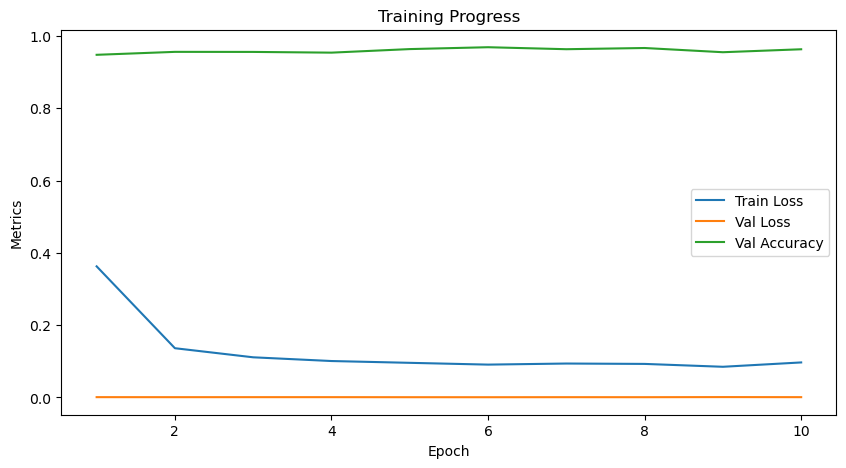

Testing [Test]: 100%|███████████████████████| 40/40 [00:01<00:00, 20.40it/s, test_acc=96.5, test_loss=0.000583]


In [31]:
trainer_model.train()
trainer_model.test()

2024-05-13 22:09:57
Epoch 1 / 10


[Valid]: 100%|█████████████████████| 24/24 [00:01<00:00, 21.53it/s, val_acc=95.3, val_loss=0.000666]


2024-05-13 22:10:09
Epoch 2 / 10


[Valid]: 100%|██████████████████████| 24/24 [00:01<00:00, 21.10it/s, val_acc=95.7, val_loss=0.00063]


2024-05-13 22:10:21
Epoch 3 / 10


[Valid]: 100%|██████████████████████| 24/24 [00:01<00:00, 21.63it/s, val_acc=96.4, val_loss=0.00053]


2024-05-13 22:10:32
Epoch 4 / 10


[Valid]: 100%|█████████████████████| 24/24 [00:01<00:00, 21.40it/s, val_acc=96.1, val_loss=0.000548]


2024-05-13 22:10:45
Epoch 5 / 10


[Valid]: 100%|█████████████████████| 24/24 [00:01<00:00, 20.56it/s, val_acc=96.2, val_loss=0.000588]


2024-05-13 22:10:57
Epoch 6 / 10


[Valid]: 100%|█████████████████████| 24/24 [00:01<00:00, 20.87it/s, val_acc=96.1, val_loss=0.000626]


2024-05-13 22:11:10
Epoch 7 / 10


[Valid]: 100%|█████████████████████| 24/24 [00:01<00:00, 20.76it/s, val_acc=96.4, val_loss=0.000597]


2024-05-13 22:11:22
Epoch 8 / 10


[Valid]: 100%|█████████████████████| 24/24 [00:01<00:00, 20.68it/s, val_acc=96.6, val_loss=0.000626]


2024-05-13 22:11:35
Epoch 9 / 10


[Valid]: 100%|█████████████████████| 24/24 [00:01<00:00, 20.79it/s, val_acc=96.4, val_loss=0.000718]


2024-05-13 22:11:47
Epoch 10 / 10


[Valid]: 100%|█████████████████████| 24/24 [00:01<00:00, 20.53it/s, val_acc=96.4, val_loss=0.000813]


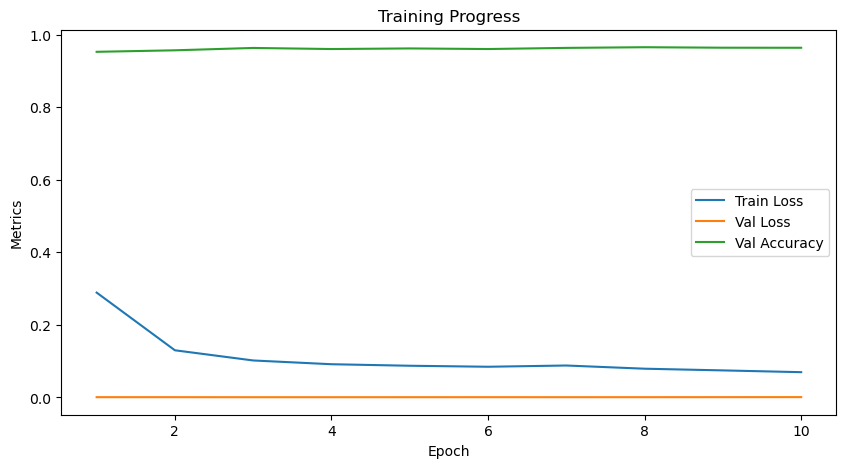

Testing [Test]: 100%|█████████████████████████| 40/40 [00:01<00:00, 20.80it/s, test_acc=97, test_loss=0.000612]


In [32]:
trainer_mlp.train()
trainer_mlp.test()